In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5fe53b184f367847aa55a2617e1b05248cac098b2c3dd14dae217169b3ce2e42b10bcc2af6d9b6787a4792a557f9705bb1eba86d761f2407d2'

In [3]:
import aocd
from aocd.models import Puzzle
day = 17
year = 2022
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [6]:
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt

In [4]:
test_data = """>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>"""

In [ ]:
tiles = """####

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##"""

In [32]:
tiles = [
    np.array([
        [1, 1, 1, 1]
    ]),

    np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0],
    ]),
    
    np.array([
        [1, 1, 1],
        [0, 0, 1],
        [0, 0, 1],
    ]),
    
    np.array([
        [1],
        [1],
        [1],
        [1],
    ]),
    
    np.array([
        [1, 1],
        [1, 1],
    ]),
]

In [12]:
data = puzzle.input_data.splitlines()
data_test = test_data.splitlines()
len(data), data[:10]

(1,
 ['><<><<<>><<<<><<<>>>><<<<>><<>><>>>><<>>><><<<<>>>><>>><>>>><<<<>><<<>>><<<><<>><<>>><><<><<<>><<<<>><<<<>>>><<<<><<>>><<<><<>>><><>>>><>>><>><>>><<>><<<>><<<>>><<<<>>>><<<<>>><<>>><<>><<<>>><<>><<>>><<<>><><>><<><>>><<>>><<>><<<>>><<<>>><<<>>>><<>>><<<<>>><><<>>>><>>><<<<>>><>>>><<<<>><<<>>>><<<>><<<>>>><<>>><><<<>>><<<<>>>><<<><<<<>><<<<><<<<>>><<<>>>><>><>>><>><<<><><<<><<>><<<<>>>><<><<<<>>>><<<><>>><>><<><<<<>><<>>><<<>>>><<><<>><<<>><><>>><<<>>>><>>><<<<><<<<><<<<>>><<<<>>>><<<>>>><<<<>>><<<>><<>>><>><<<<>>>><<>>><<>>>><<<><<<>><>><<<<>><><>><>>>><<<>>><<<<>>>><<<<>>><<<<><<>>>><<<>>>><<<<>><<<>><>>>><<<>>><<<<>>>><>><<>><<<<>>><<<>>><<<>>>><><<>>>><<<<>><<>><<>>>><<>>><<>>><<<>>>><>>><<<>>><<<<>><>>>><<<<>>>><<<<>>><<<>>><<<>>><<<<><<<>>><><<<<>>><>>><<<<>>>><<<<>><>><<<<>><>>>><<<<>><<><<<><<><<<<><>>>><<>><><<<<><<<<>><>><<>>>><<<<>><>>><>><>><>>><>><<><<<><<<>>>><><>>>><<<>>><<<<>>><>>>><<>><>>><>>>><><<<><<<<>><<<><<<<>>>><<>>><<<><<<>>><<<>>><<<<>><>>>><<<<><<>>><<<>

In [307]:
class GameBoard():
    def __init__(self, wind, tiles, width=7, height=4000):
        self.board = np.zeros((height, width))
        self.width = width
        self.wind = wind
        self.tiles = tiles
        self.wind_iter = cycle(wind)
        self.cycle_length = len(wind)
        self.tile_iter = cycle(tiles)
        self.height = 0
        self.wind_cnt = 0
        self.iwind = -1
        self.itile = -1
        self.nwind = len(wind)
        self.ntiles= len(tiles)
        self.seen = {}
        self.totalwind = 0
        self.totaltiles = 0
        
    def _get_height(self):
        return self.height
    
    def check(self, tile, x, y):
        h, w = tile.shape
        # print(h, w, 'shape')
        if (x < 0) or (x + w) > self.width:
            # print('denied', x+w)
            return False
        if (y < 0):
            return False
        sub = self.board[y:y+h, x:x+w]
        # print((tile * sub).max(), x, y)
        if (tile * sub).max() > 0:
            # print('no')
            return False
        # print('yes')
        return True
    
    def add_tile(self, tile, x, y):
        h, w = tile.shape
        sub = self.board[y:y+h, x:x+w]
        sub += tile
        self.height = max(self.height, y+h)
        
    def get_next_tile(self):
        self.itile += 1
        self.itile %= self.ntiles
        self.totaltiles += 1
        return self.tiles[self.itile]
    
    def get_next_wind(self):
        self.iwind += 1
        self.iwind %= self.nwind
        self.totalwind += 1
        return self.wind[self.iwind]

    def place_tile(self):
        tile = self.get_next_tile()
        # print(tile, self._get_height())
        y, x = (self._get_height()+3, 2)
        while True:
            direction = self.get_next_wind()
            self.wind_cnt += 1
            
            # print(x, y, direction)
            if direction == '<':
                if self.check(tile, x-1, y):
                    x -= 1
                    # print('x: ', x)
            else:
                # print('>')
                if self.check(tile, x+1, y):
                    # print('>>')
                    x += 1
            if self.check(tile, x, y-1):
                y -= 1
                continue
            else:
                self.add_tile(tile, x, y)
                lookup = (self.itile, self.iwind)
                if lookup in self.seen:
                    print(lookup, self.seen[lookup], self._get_height(), self.totaltiles)
                else:
                    self.seen[lookup] = self._get_height()
                return 
            

In [308]:
board = GameBoard(data[0], tiles)
res = []
for i in range(2022):
    board.place_tile()
    res.append(board._get_height())

(4, 160) 39 2817 1765
(4, 210) 59 2823 1770
(2, 436) 112 2874 1808
(3, 442) 114 2876 1809
(4, 446) 116 2878 1810
(0, 450) 117 2879 1811
(1, 455) 119 2881 1812
(2, 459) 122 2884 1813
(4, 725) 183 2942 1855
(4, 867) 210 2980 1880
(0, 871) 211 2981 1881
(1, 876) 213 2983 1882
(2, 880) 216 2986 1883


In [309]:
board.totalwind

11784

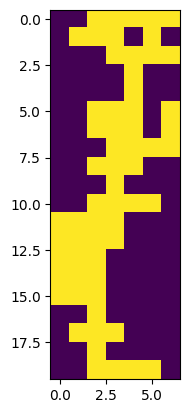

In [297]:
plt.imshow(np.flipud(board.board[:20, :]))

In [298]:
height = board._get_height()
height

3206

In [156]:
puzzle.answer_a = int(height)

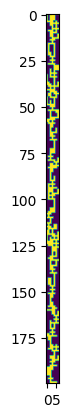

In [228]:
plt.imshow(np.flipud(board.board[:200, :]))

In [230]:
(board.board.sum(axis=1) == 7).sum()

15

# Part 2

In [192]:
num_rocks = 1000000000000

In [370]:
%%time
n_wind = len(data[0])
board = GameBoard(data[0], tiles, height=40000)
# board = GameBoard(test_data, tiles)
res = []
for i in range(20000):
    board.place_tile()
    res.append(board._get_height())


(4, 160) 39 2817 1765
(4, 210) 59 2823 1770
(2, 436) 112 2874 1808
(3, 442) 114 2876 1809
(4, 446) 116 2878 1810
(0, 450) 117 2879 1811
(1, 455) 119 2881 1812
(2, 459) 122 2884 1813
(4, 725) 183 2942 1855
(4, 867) 210 2980 1880
(0, 871) 211 2981 1881
(1, 876) 213 2983 1882
(2, 880) 216 2986 1883
(2, 2475) 624 3403 2148
(3, 2481) 626 3405 2149
(4, 2485) 628 3407 2150
(0, 2489) 629 3408 2151
(1, 2493) 632 3411 2152
(2, 2497) 635 3414 2153
(1, 2689) 675 3456 2182
(2, 2694) 677 3458 2183
(3, 2700) 679 3460 2184
(4, 2708) 679 3460 2185
(0, 2712) 680 3461 2186
(1, 2717) 682 3463 2187
(2, 2723) 683 3464 2188
(3, 2729) 685 3466 2189
(4, 2733) 687 3468 2190
(0, 2742) 687 3468 2191
(1, 2750) 687 3468 2192
(2, 2756) 688 3469 2193
(3, 2761) 691 3472 2194
(4, 2765) 693 3474 2195
(0, 2769) 694 3475 2196
(1, 2773) 697 3478 2197
(2, 2780) 697 3478 2198
(3, 2786) 699 3480 2199
(4, 2790) 701 3482 2200
(0, 2798) 701 3482 2201
(1, 2802) 704 3485 2202
(2, 2806) 707 3488 2203
(3, 2819) 707 3488 2204
(4, 282

In [397]:
def find_period(heights):
    for i in range(100, 4000):
        deltas = heights[2000::i]
        # print(i, j, deltas)
        diffs = np.diff(deltas)
        if len(set(diffs)) == 1:
            # print(i, diffs)
            period = i
            delta_rocks = diffs[0]
            break
            
    for i in range(0, 2000):
        deltas = heights[i::period]
        # print(i, j, deltas)
        diffs = np.diff(deltas)
        if len(set(diffs)) == 1:
            print(i)
            start = i
            break
    return (start, period, delta_rocks)

In [398]:
start, period, dy = find_period(res)

423


In [410]:
def get_height(n, res, frq, dy):
    nrocks = ((n // frq) - 1) * dy # we can't use the values below 423 they are not in the repeating pattern yet hence - 1
    return nrocks + res[(n % frq) + period - 1] # we have to add n%frq + period rocks (-1 cause res has the height after 1 rock at index 0)

In [412]:
ans = get_height(num_rocks, res, period, dy)
ans

1602881844347

In [413]:
puzzle.answer_b = ans

Part b already solved with different answer: 1602881844347
